In [1]:
import pandas as pd
import glob

import seaborn as sns

### from star manual
column 1: chromosome
column 2: first base of the intron (1-based)
column 3: last base of the intron (1-based)
column 4: strand (0: undefined, 1: +, 2: -)
column 5: intron motif: 0: non-canonical; 1: GT/AG, 2: CT/AC, 3: GC/AG, 4: CT/GC, 5:
AT/AC, 6: GT/AT
column 6: 0: unannotated, 1: annotated in the splice junctions database. Note that in 2-pass
mode, junctions detected in the 1st pass are reported as annotated, in addition to
annotated junctions from GTF.
column 7: number of uniquely mapping reads crossing the junction
column 8: number of multi-mapping reads crossing the junction
column 9: maximum spliced alignment overhan

In [2]:
column_names = ['chromosome', 'first_intron', 'last_intron', 'strand', 'intron_motif', 'annotated', 'unique_map', 'multi_map', 'max_overhang']

In [3]:
file = glob.glob("/home/michaelswift/repos/shared_data/tabula_bursa/star_solo_vdj/*/SJ*")

In [4]:
dfs = []
for i in file:
    df = pd.read_table(i, header=None, index_col=None, low_memory=False)
    df.columns = column_names
    df['sample_uid'] = i.split('/')[-2]
    dfs.append(df)

In [5]:
df = pd.concat(dfs)

### filter data 

In [6]:
df = df[(df.chromosome == '14')]

In [7]:
df = df[df.unique_map > 10]

In [8]:
# if transcription is negative strand, then donor is last_intron and acceptor in first_intron
df = df[df.strand == 2]
df.columns = ['chromosome', 'splice_acceptor', 
              'splice_donor', 'strand', 'intron_motif',
              'annotated', 'unique_map', 'multi_map', 'max_overhang', 'sample_uid'] 

### splice acceptor is in the IGHC Locus

IGHJ6 coordinate = 105863197

In [9]:

df = df[(df.splice_acceptor > 105540000) & (df.splice_acceptor < 105863197)]

In [10]:
# just I exons, donor is after the last J
df = df[df.splice_donor < 105863195]

In [11]:
# normalize 
df.loc[:,'norm_unique_counts'] = df.groupby('sample_uid').unique_map.transform(lambda x: (x - x.mean()) / x.std())

In [12]:
df.loc[:, 'intron_length'] = df['splice_acceptor'] - df['splice_donor']
df['intron_length'] = df['intron_length'] * (-1)

In [13]:
df.sort_values('unique_map', ascending=False)

,chromosome,splice_acceptor,splice_donor,strand,intron_motif,annotated,unique_map,multi_map,max_overhang,sample_uid,norm_unique_counts,intron_length
60739,14,105588375,105708644,2,2,1,747527,311059,55,TBd3_frozen_PBa,18.578927,120269
46824,14,105588375,105708644,2,2,1,490764,264824,72,TBd5_fresh_PB,19.468898,120269
43189,14,105708622,105773092,2,2,1,410231,11791,29,TBd3_frozen_PBoverA,15.647571,64470
15828,14,105588375,105708644,2,2,1,403595,148953,55,TBd3_fresh_P6,13.508332,120269
38575,14,105708652,105712643,2,2,1,341318,22833,74,TBd1_frozen_LNa,13.187801,3991
...,...,...,...,...,...,...,...,...,...,...,...,...
34700,14,105669845,105861313,2,2,1,11,119,50,TBd5_frozen_BMoverB,-0.143688,191468
34659,14,105669700,105742924,2,2,1,11,119,37,TBd5_frozen_BMoverB,-0.143688,73224
58933,14,105643870,105668909,2,2,1,11,1114,45,TBd4_frozen_BMoverA,-0.360111,25039
45618,14,105743071,105862986,2,2,1,11,3,62,TBd5_frozen_SPoverA,-0.190742,119915


In [14]:
df.sort_values('intron_length', ascending=False)

,chromosome,splice_acceptor,splice_donor,strand,intron_motif,annotated,unique_map,multi_map,max_overhang,sample_uid,norm_unique_counts,intron_length
14251,14,105588395,105863131,2,2,1,20,17,74,TBd2_frozen_LN1,-0.212947,274736
53429,14,105588395,105863131,2,2,1,17,4,33,TBd4_frozen_PBb,-0.246873,274736
60812,14,105588395,105863131,2,2,1,11,49,59,TBd3_frozen_PBa,-0.100217,274736
24316,14,105588395,105863131,2,2,1,17,13,74,TBd4_frozen_BMa,-0.432877,274736
69787,14,105588395,105863131,2,2,1,15,11,73,TBd4_frozen_BMoverB,-0.333420,274736
...,...,...,...,...,...,...,...,...,...,...,...,...
43479,14,105742793,105742819,2,2,1,29,6,16,TBd3_frozen_PBoverA,-0.093120,26
25048,14,105709898,105709922,2,4,1,16,1,50,TBd2_frozen_BMoverB,-0.088591,24
42414,14,105708579,105708602,2,2,1,26,0,62,TBd3_frozen_PBb,-0.097134,23
48322,14,105708579,105708599,2,2,1,18,18,65,TBd5_fresh_PB,-0.120827,20


In [15]:
df.reset_index(drop=True, inplace=True)

In [16]:
samplesheet = pd.read_table("../../snakemake_workflow/samplesheets/samplesheet.tsv")

In [17]:
samplesheet = samplesheet[samplesheet.lib_type == 'vdj']

In [18]:
df = pd.merge(df, samplesheet, left_on='sample_uid', right_on='sample_uid', how = 'left')

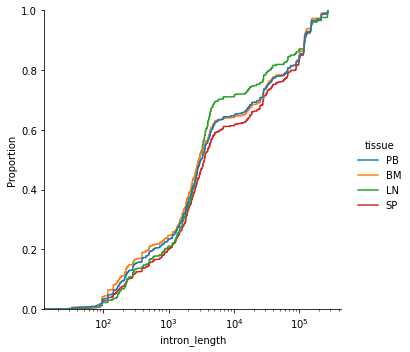

In [19]:
x = 'intron_length'
sns.displot(data = df, x=x, log_scale=True, hue = 'tissue', kind='ecdf')

In [28]:
df.groupby('splice_acceptor').splice_donor.value_counts()

splice_acceptor  splice_donor
105565506        105685037       4
105569222        105569835       1
105569325        105689686       1
105569403        105569571       1
105569482        105689492       2
                                ..
105861717        105861786       1
105861759        105861950       2
105861787        105861950       1
                 105863131       1
105862302        105863131       1
Name: splice_donor, Length: 1398, dtype: int64

for i in df.iteritems():
    print(i)

In [30]:
top_acceptors = df.splice_acceptor.value_counts() > 20

In [33]:
sub_df = df[df.splice_acceptor.isin(top_acceptors[top_acceptors].index)]

In [35]:
sub_df.groupby('splice_acceptor').splice_donor.value_counts()

splice_acceptor  splice_donor
105587332        105587553       30
                 105707784        6
105587875        105708358       25
                 105588088       19
                 105587957        1
                                 ..
105856911        105859259        1
                 105859796        1
105860448        105861313       19
                 105860961        6
                 105861190        1
Name: splice_donor, Length: 777, dtype: int64